In [3]:
from google.colab import drive
drive.mount('/content/drive')

# connecting colab with google drive so it can read files from my drive
# needed for next step

Mounted at /content/drive


In [4]:

import pandas as pd

# Load the ACC data (semicolon-separated and encoding handled)
acc_df = pd.read_csv('/content/drive/My Drive/acc_players-2324F.csv',
                     sep=',', encoding='latin1')
# file is stored in my Google Drive - not in a folder - pulling from there

# setting column names as the data in the first row since that was initially
# the column names --> would have made it hard to run any analysis/sorting
acc_df.columns = acc_df.iloc[0]

# Drop the first row since it was previously just a header
acc_df = acc_df.drop(0).reset_index(drop=True)

# Display the first few rows of each dataset
print("ACC Players Data:")
acc_df.head()


ACC Players Data:


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


**Exploring the Data**

In [5]:
# Get basic information about the datasets
print("Regular Season Data Info:")
acc_df.info()


Regular Season Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      217 non-null    object
 1   Player  217 non-null    object
 2   Class   217 non-null    object
 3   Pos     217 non-null    object
 4   School  217 non-null    object
 5   G       217 non-null    object
 6   MP      217 non-null    object
 7   TRB     217 non-null    object
 8   AST     217 non-null    object
 9   STL     217 non-null    object
 10  BLK     217 non-null    object
 11  TOV     217 non-null    object
 12  PF      217 non-null    object
 13  PTS     217 non-null    object
 14  FG%     204 non-null    object
 15  2P%     194 non-null    object
 16  3P%     182 non-null    object
 17  FT%     176 non-null    object
 18  PER     216 non-null    object
 19  WS      217 non-null    object
 20  BPM     217 non-null    object
dtypes: object(21)
memory usage: 35.7+ KB

In [48]:
# Basic data cleaning

# Dropping any rows with missing values (if necessary)
acc_df = acc_df.dropna()

# need to cast the points/other columns into right data types so that they add
# correctly - without this step, python will "sum" objects like 34+2=342
acc_df['Points'] = acc_df['Points'].astype(float)
acc_df['Games'] = acc_df['Games'].astype(int)
acc_df['Minutes'] = acc_df['Minutes'].astype(float)
acc_df['Rebounds'] = acc_df['Rebounds'].astype(float)
acc_df['Assists'] = acc_df['Assists'].astype(float)
acc_df['Steals'] = acc_df['Steals'].astype(float)
acc_df['Blocks'] = acc_df['Blocks'].astype(float)
acc_df['FG%'] = acc_df['FG%'].astype(float)
acc_df['2P%'] = acc_df['2P%'].astype(float)
acc_df['3P%'] = acc_df['3P%'].astype(float)
acc_df['FT%'] = acc_df['FT%'].astype(float)
acc_df['WS'] = acc_df['WS'].astype(float)

acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 216
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        157 non-null    object 
 1   Player    157 non-null    object 
 2   Class     157 non-null    object 
 3   Pos       157 non-null    object 
 4   School    157 non-null    object 
 5   Games     157 non-null    int64  
 6   Minutes   157 non-null    float64
 7   Rebounds  157 non-null    float64
 8   Assists   157 non-null    float64
 9   Steals    157 non-null    float64
 10  Blocks    157 non-null    float64
 11  TOV       157 non-null    object 
 12  PF        157 non-null    object 
 13  Points    157 non-null    float64
 14  FG%       157 non-null    float64
 15  2P%       157 non-null    float64
 16  3P%       157 non-null    float64
 17  FT%       157 non-null    float64
 18  PER       157 non-null    object 
 19  WS        157 non-null    float64
 20  BPM       157 non-null    object 
dty

In [22]:
# Calculate the total points scored by all players combined

total_points = acc_df['Points'].sum()
print(f"\nTotal Points Scored by All Players: {total_points}")


Total Points Scored by All Players: 36907.0


In [23]:
# Find the player who has played the most minutes (MP)
top_player = acc_df[['Player', 'Minutes']].sort_values(by='Minutes', ascending=False).head(1)
print("Player with Most Minutes Played:")
top_player


Player with Most Minutes Played:


,Player,Minutes
135,Casey Morsell,1333.0


In [24]:
# Identify the top 5 players in terms of total rebounds (TRB)

top_rbders = acc_df[['Player', 'Rebounds']].sort_values(by='Rebounds', ascending=False).head(5)
print("Top 5 Players by Total Rebounds:")
top_rbders

Top 5 Players by Total Rebounds:


,Player,Rebounds
5,Armando Bacot,380.0
178,Ian Schieffelin,340.0
90,Harrison Ingram,327.0
44,Mohamed Diarra,311.0
149,Norchad Omier,309.0


In [30]:
# Create a new DataFrame containing only players who played more than 500 minutes

starters = acc_df[acc_df['Minutes'] > 500]
print("Players who Played More Than 500 Minutes:")
starters.head(10)

Players who Played More Than 500 Minutes:


,Rk,Player,Class,Pos,School,Games,Minutes,Rebounds,Assists,Steals,...,TOV,PF,Points,FG%,2P%,3P%,FT%,PER,WS,BPM
2,3,Prince Aligbe,SO,F,Boston College,35,651.0,119.0,21.0,15.0,...,30,51,164.0,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
4,5,Zack Austin,JR,F,Pittsburgh,33,746.0,137.0,29.0,32.0,...,13,35,216.0,0.417,0.563,0.295,0.737,18,2.9,7.9
5,6,Armando Bacot,SR,F,North Carolina,37,1123.0,380.0,56.0,22.0,...,60,100,538.0,0.540,0.544,0.400,0.781,24.6,6.1,8.9
7,8,Reece Beekman,SR,G,Virginia,34,1114.0,124.0,212.0,68.0,...,70,43,486.0,0.443,0.487,0.310,0.754,23.4,4.9,10.5
9,10,Chris Bell,SO,F,Syracuse,32,865.0,75.0,21.0,18.0,...,26,58,384.0,0.434,0.459,0.420,0.842,14.9,2.2,3.3
10,11,Robbie Beran,SR,F,Virginia Tech,34,758.0,133.0,38.0,20.0,...,35,98,191.0,0.442,0.571,0.316,0.800,11.5,1.8,3
13,14,Carey Booth,FR,F,Notre Dame,33,656.0,142.0,15.0,7.0,...,25,42,211.0,0.391,0.541,0.297,0.634,12.9,1.5,2
16,17,Maliq Brown,SO,F,Syracuse,32,948.0,230.0,59.0,71.0,...,41,97,305.0,0.698,0.736,0.368,0.721,22,4.3,7.4
19,20,D.J. Burns Jr.,SR,F,NC State,41,1020.0,164.0,117.0,18.0,...,76,100,529.0,0.531,0.535,0.200,0.680,20.9,3.3,5.7
20,21,Markus Burton,FR,G,Notre Dame,33,1114.0,110.0,143.0,63.0,...,123,95,577.0,0.421,0.468,0.300,0.821,18.2,2.9,4


In [29]:
# From this filtered DataFrame, determine the player with the highest total assists (AST).

starter_assists = starters[['Player', 'Assists']].sort_values(by='Assists', ascending=False)
print("Top Starter by Total Assists:")
starter_assists.head(1)

Top Starter by Total Assists:


,Player,Assists
7,Reece Beekman,212.0


In [31]:
# Who are the top 3 Assist Leads in the League?

best_assists = acc_df[['Player', 'Assists']].sort_values(by='Assists', ascending=False)
print("Top 3 Assisters in the League:")
best_assists.head(3)

Top 3 Assisters in the League:


,Player,Assists
7,Reece Beekman,212.0
215,Jaeden Zackery,152.0
21,Elliot Cadeau,150.0


In [32]:
# Who are the top 3 Shot Blockers?

best_blockers = acc_df[['Player', 'Blocks']].sort_values(by='Blocks', ascending=False)
print("Top 3 Shot Blockers in the League:")
best_blockers.head(3)

Top 3 Shot Blockers in the League:


,Player,Blocks
51,Ryan Dunn,77.0
157,Quinten Post,61.0
5,Armando Bacot,56.0


In [41]:
# Group the players by School and calculate the total points scored by each school.

team_points = acc_df.groupby('School')[['Points']].sum().reset_index().sort_values(by='Points', ascending=False)
print("Total Points per School:")
team_points

Total Points per School:


,School,Points
7,NC State,3097.0
8,North Carolina,3007.0
1,Clemson,2783.0
2,Duke,2738.0
14,Wake Forest,2718.0
0,Boston College,2635.0
3,Florida State,2444.0
6,Miami (FL),2424.0
11,Syracuse,2372.0
10,Pittsburgh,2339.0


In [42]:
# Group the players by School and calculate the total assists (AST) for each team.

team_assists = acc_df.groupby('School')[['Assists']].sum().reset_index().sort_values(by='Assists', ascending=False)
print("Total Assists per School:")
team_assists

Total Assists per School:


,School,Assists
2,Duke,544.0
7,NC State,536.0
8,North Carolina,535.0
1,Clemson,533.0
0,Boston College,500.0
12,Virginia,488.0
6,Miami (FL),454.0
13,Virginia Tech,454.0
11,Syracuse,439.0
14,Wake Forest,426.0


In [44]:
# Sort the schools by total points scored and display the top 3 schools.

team_points = acc_df.groupby('School')[['Points']].sum().reset_index().sort_values(by='Points', ascending=False)
print("Top 3 Highest Scoring Schools:")
team_points.head(3)

Top 3 Highest Scoring Schools:


,School,Points
7,NC State,3097.0
8,North Carolina,3007.0
1,Clemson,2783.0


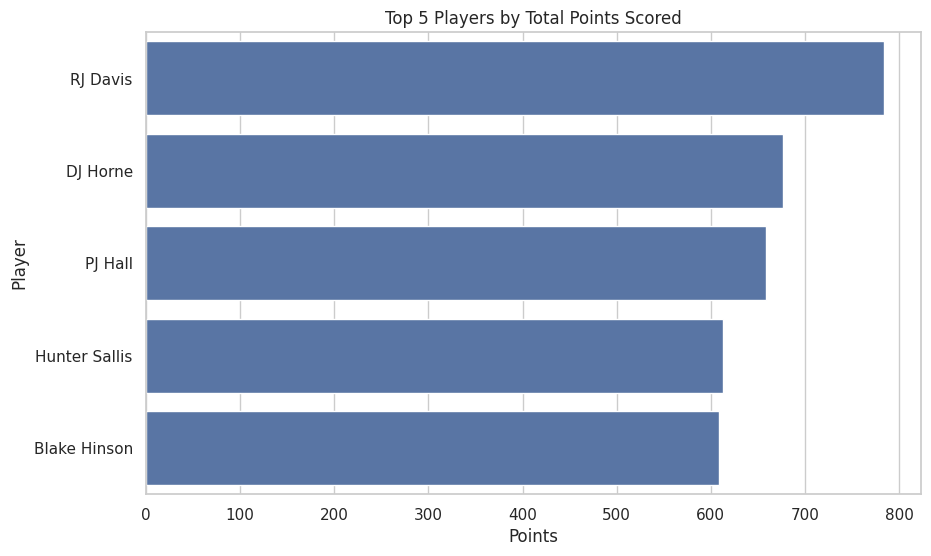

In [47]:
# Extra credit: Create a bar chart showing the top 5 players by total points scored (PTS).
top_scorers = acc_df[['Player', 'Points']].sort_values(by='Points', ascending=False).head(5)

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot a bar chart of the top 5 scorers
plt.figure(figsize=(10,6))
sns.barplot(x='Points', y='Player', data=top_scorers)
plt.title('Top 5 Players by Total Points Scored')
plt.show()

Correlation Coefficient between FG% and WS: 0.4334177195258408


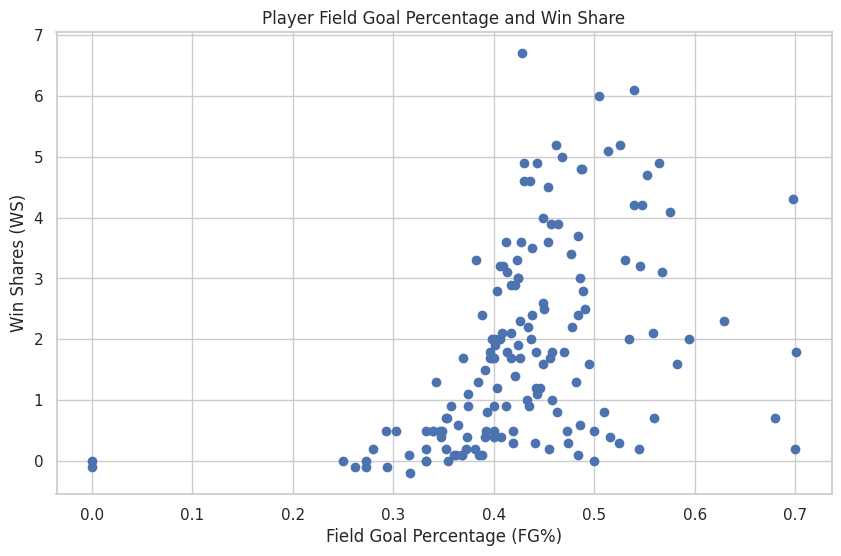

In [55]:
# Correlation: Investigate whether there is any correlation between a player's
# field goal percentage (FG%) and their win shares (WS). Provide a scatter plot
# and calculate the correlation coefficient.

# Calculate the correlation coefficient -
# found this function through internet research
correlation = acc_df['FG%'].corr(acc_df['WS'])
print(f"Correlation Coefficient between FG% and WS: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(acc_df['FG%'], acc_df['WS'])
plt.title('Player Field Goal Percentage and Win Share')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.show()